In [31]:
#Importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [32]:
#Reading the data
df = pd.read_csv('FraudFinal.csv')

#Creating a numeric and categorical dataset
df['Fraud'] = [1 if i == 'Yes' else 0 for i in df['Fraud']]

df['Income_Cit'] = [int(re.sub(r'[^\w]','',i)) for i in df['Annual_Income_Uscitizen']]
df['Income_Imm'] = [int(re.sub(r'[^\w]','',i)) for i in df['Annual_Income_Immigrant']]
df['Income_Cit'] = pd.qcut(df.Income_Cit, q=5, labels=range(5))
df['Income_Imm'] = pd.qcut(df.Income_Imm, q=5, labels=range(5))
df['Income_Cit'] = [int(i) for i in df['Income_Cit']]
df['Income_Imm'] = [int(i) for i in df['Income_Imm']]

df['Age_Bin_Cit'] = pd.qcut(df.Age_of_Uscitizen, q=5, labels=range(5))
df['Age_Bin_Imm'] = pd.qcut(df.Age_of_Immigrant, q=5, labels=range(5)) 
df['Age_Bin_Cit'] = [int(i) for i in df['Age_Bin_Cit']]
df['Age_Bin_Imm'] = [int(i) for i in df['Age_Bin_Imm']]

df['Emp_Cit_FT'] = [1 if i == 'FT' else 0 for i in df['Employment_Uscitizen']]
df['Emp_Cit_PT'] = [1 if i == 'PT' else 0 for i in df['Employment_Uscitizen']]
df['Emp_Cit_Temp'] = [1 if i == 'Temporary' else 0 for i in df['Employment_Uscitizen']]
df['Emp_Cit_U'] = [1 if i == 'Unemployed' else 0 for i in df['Employment_Uscitizen']]

df['Emp_Imm_FT'] = [1 if i == 'FT' else 0 for i in df['Employment_Immigrant']]
df['Emp_Imm_PT'] = [1 if i == 'PT' else 0 for i in df['Employment_Immigrant']]
df['Emp_Imm_Temp'] = [1 if i == 'Temporary' else 0 for i in df['Employment_Immigrant']]
df['Emp_Imm_U'] = [1 if i == 'Unemployed' else 0 for i in df['Employment_Immigrant']]

df['Sex_Cit'] = [1 if i == 'M' else 0 for i in df['Sex_Uscitizen']]
df['Sex_Imm'] = [1 if i == 'M' else 0 for i in df['Sex_Immigrant']]

df['High_Ed_Cit'] = [1 if i == 'Yes' else 0 for i in df['HigherEducation_Uscitizen']]
df['High_Ed_Imm'] = [1 if i == 'Yes' else 0 for i in df['HigherEducation_Immigrant']]

df['Zip_Code'] = df['Zip_Code'].fillna(0)
df['Zip_Code'] = [int(i/100) for i in df['Zip_Code']]

df['Crime_Cit'] = [1 if i == 'Yes' else 0 for i in df['History_of_Crime_UScitizen']]
df['Crime_Imm'] = [1 if i == 'Yes' else 0 for i in df['History_of_Crime_Immigrant']]
df['Marital_Status'] = [1 if i == 'Married' else 0 for i in df['Marital_Status']]

df['Child_Bef_Marriage_Cit'] = [1 if i == 'Yes' else 0 for i in df['ChildrenBeforeMarriage_Uscitizen']]
df['Foreign_Residence_Imm'] = [1 if i == 'Yes' else 0 for i in df['Foreign_Residence_Requirement_Immigrant']]
df['Exp_Passport'] = [1 if i == 'Yes' else 0 for i in df['Expired_Passport_Marriage']]

df['Marriage_Month'] = [int(i.split('/')[0]) for i in df['Date_of_Marriage']]
df['Marriage_Year'] = [int(i.split('/')[2]) for i in df['Date_of_Marriage']]

df['Citizenship_Immigrant'] = df['Citizenship_Immigrant'].astype('category')
df['Citizenship_Immigrant'] = df['Citizenship_Immigrant'].cat.codes

dataCit = []
dataImm = []
for line in df.iloc:
  if line['StatusSpouse1'] == 'Immigrant':
    dataImm.append(line['Race_Spouse1'])
    dataCit.append(line['Race_Spouse2'])
  else:
    dataImm.append(line['Race_Spouse2'])
    dataCit.append(line['Race_Spouse1'])

df['Race_Cit'] = dataCit
df['Race_Imm'] = dataImm
df['Race_Cit'] = df['Race_Cit'].astype('category')
df['Race_Imm'] = df['Race_Imm'].astype('category')
df['Race_Cit'] = df['Race_Cit'].cat.codes
df['Race_Imm'] = df['Race_Imm'].cat.codes

In [33]:
#Dropping coloums 
colsToDrop = ['Address','City','State','Marital_Status','Zip_Code','Marriage_Month','Marriage_Year','Date_of_Marriage', 'Foreign_Residence_Imm', 'Race_Cit', 'Race_Imm','Citizenship_Immigrant', 'Crime_Cit', 'Income_Cit','Crime_Imm','Exp_Passport']
colsToDrop.extend(['StatusSpouse1','Age_Spouse1','Sex_Spouse1','Race_Spouse1','Hispanic_Spouse1','Education_Spouse1','Employment_Spouse1','Monthly_Income_Spouse1','Annual_Income_Spouse1','Citizenship_Spouse1'])
colsToDrop.extend(['StatusSpouse2','Age_Spouse2','Sex_Spouse2','Race_Spouse2','Hispanic_Spouse2','Education_Spouse2','Employment_Spouse2','Monthly_Income_Spouse2','Annual_Income_Spouse2','Citizenship_Spouse2'])
colsToDrop.extend(['Employment_Uscitizen','Annual_Income_Uscitizen','Age_of_Uscitizen','Sex_Uscitizen','History_of_Crime_UScitizen','Education_UScitizen','HigherEducation_Uscitizen'])
colsToDrop.extend(['Employment_Immigrant','Annual_Income_Immigrant','Age_of_Immigrant','Sex_Immigrant','History_of_Crime_Immigrant','Education_Immigrant','HigherEducation_Immigrant'])
colsToDrop.extend(['Previously_Married_Uscitizen','ChildrenBeforeMarriage_Uscitizen','Foreign_Residence_Requirement_Immigrant','Expiration_Date_of_Passport_Immigrant','Expired_Passport_Marriage','Previously_Denied_Visa_Immigrant','USCIS_id_Immigrant'])

df = df.drop(colsToDrop,axis=1)

In [34]:
df.head(5)

,Fraud,Years_Married,Children,Income_Imm,Age_Bin_Cit,Age_Bin_Imm,Emp_Cit_FT,Emp_Cit_PT,Emp_Cit_Temp,Emp_Cit_U,Emp_Imm_FT,Emp_Imm_PT,Emp_Imm_Temp,Emp_Imm_U,Sex_Cit,Sex_Imm,High_Ed_Cit,High_Ed_Imm,Child_Bef_Marriage_Cit
0,1,6,0,3,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1
1,1,1,0,4,2,3,1,0,0,0,1,0,0,0,0,1,0,1,1
2,1,4,0,2,3,0,0,1,0,0,1,0,0,0,0,1,0,1,1
3,1,14,0,4,3,2,0,1,0,0,1,0,0,0,0,1,0,1,0
4,1,6,0,1,4,0,0,0,1,0,0,1,0,0,0,1,0,0,1


In [35]:
#Looking at the different data for each column
for col in df.columns:
  print(col, ":", set(df[col]))

Fraud : {0, 1}
Years_Married : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Children : {0, 1, 2, 3, 4, 5}
Income_Imm : {0, 1, 2, 3, 4}
Age_Bin_Cit : {0, 1, 2, 3, 4}
Age_Bin_Imm : {0, 1, 2, 3, 4}
Emp_Cit_FT : {0, 1}
Emp_Cit_PT : {0, 1}
Emp_Cit_Temp : {0, 1}
Emp_Cit_U : {0, 1}
Emp_Imm_FT : {0, 1}
Emp_Imm_PT : {0, 1}
Emp_Imm_Temp : {0, 1}
Emp_Imm_U : {0, 1}
Sex_Cit : {0, 1}
Sex_Imm : {0, 1}
High_Ed_Cit : {0, 1}
High_Ed_Imm : {0, 1}
Child_Bef_Marriage_Cit : {0, 1}


In [36]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Fraud'],axis = 1), df['Fraud'], test_size = 0.33, random_state = 18347)

#Linear Kernel. Fitting training data and then predicting the test
clf = svm.SVC(kernel='linear') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [37]:
#Adding our prediction to the data
df['Pred'] = clf.predict(df.drop(['Fraud'],axis = 1))
df.head(5)

,Fraud,Years_Married,Children,Income_Imm,Age_Bin_Cit,Age_Bin_Imm,Emp_Cit_FT,Emp_Cit_PT,Emp_Cit_Temp,Emp_Cit_U,Emp_Imm_FT,Emp_Imm_PT,Emp_Imm_Temp,Emp_Imm_U,Sex_Cit,Sex_Imm,High_Ed_Cit,High_Ed_Imm,Child_Bef_Marriage_Cit,Pred
0,1,6,0,3,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1
1,1,1,0,4,2,3,1,0,0,0,1,0,0,0,0,1,0,1,1,1
2,1,4,0,2,3,0,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,1,14,0,4,3,2,0,1,0,0,1,0,0,0,0,1,0,1,0,1
4,1,6,0,1,4,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1


In [38]:
#dataset with the pred column 
df.head(5) 

,Fraud,Years_Married,Children,Income_Imm,Age_Bin_Cit,Age_Bin_Imm,Emp_Cit_FT,Emp_Cit_PT,Emp_Cit_Temp,Emp_Cit_U,Emp_Imm_FT,Emp_Imm_PT,Emp_Imm_Temp,Emp_Imm_U,Sex_Cit,Sex_Imm,High_Ed_Cit,High_Ed_Imm,Child_Bef_Marriage_Cit,Pred
0,1,6,0,3,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1
1,1,1,0,4,2,3,1,0,0,0,1,0,0,0,0,1,0,1,1,1
2,1,4,0,2,3,0,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,1,14,0,4,3,2,0,1,0,0,1,0,0,0,0,1,0,1,0,1
4,1,6,0,1,4,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1


In [41]:
#Accuracy, predicted vs actual
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("ROC_AUC:", metrics.roc_auc_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9481818181818182
ROC_AUC: 0.9480035588286723
F1 Score: 0.9495723975228547


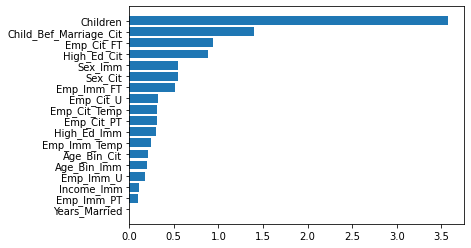

In [40]:
#Feature Importance Chart

numFeat = 18
feats = list(df.columns)
feats.pop(0)
coef, feats = zip(*sorted(list(zip(abs(clf.coef_[0]), feats))))

plt.barh(range(numFeat), coef[-numFeat:], align='center')
plt.yticks(range(numFeat), feats[-numFeat:])
plt.show()